In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [2]:
from zipfile import ZipFile

data_path = 'dataset_cat_dog.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [3]:
path = 'dataset_cat_dog'
classes = os.listdir(path)
classes

['load_img', 'cats', 'dogs']

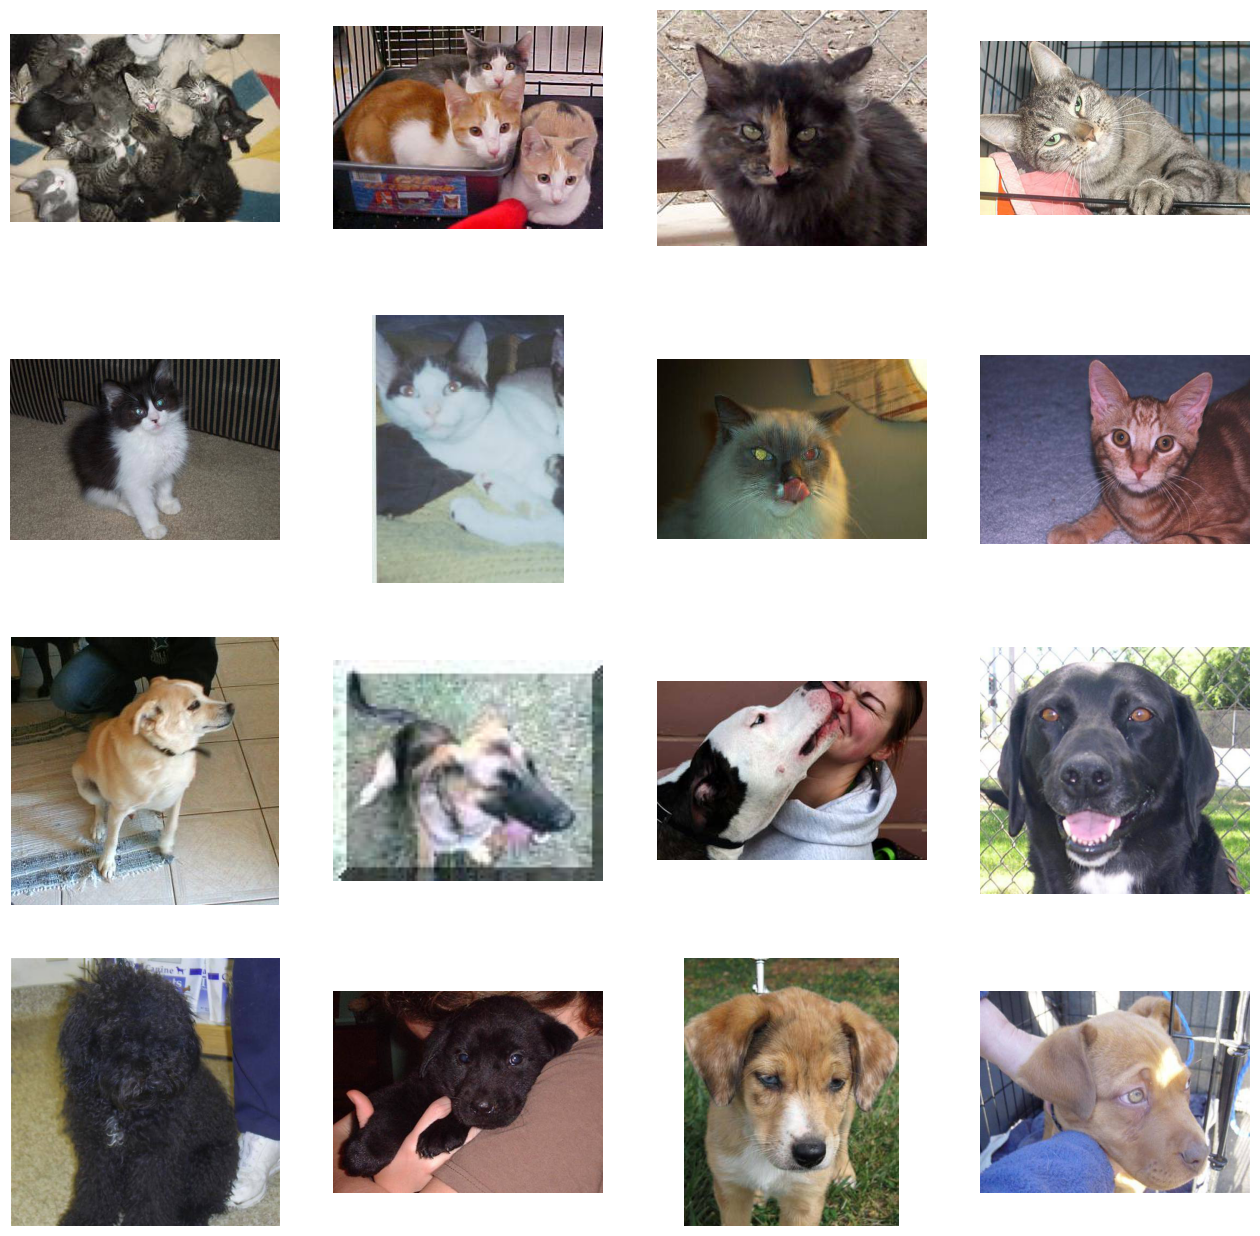

In [4]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dataset_cat_dog/cats')
dog_dir = os.path.join('dataset_cat_dog/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

base_dir = 'dataset_cat_dog'

# Buat dataset
train_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(200, 200),
    subset='training',
    seed=1,
    validation_split=0.1,
    batch_size=32
)

test_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(200, 200),
    subset='validation',
    seed=1,
    validation_split=0.1,
    batch_size=32
)

Found 965 files belonging to 3 classes.
Using 869 files for training.
Found 965 files belonging to 3 classes.
Using 96 files for validation.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

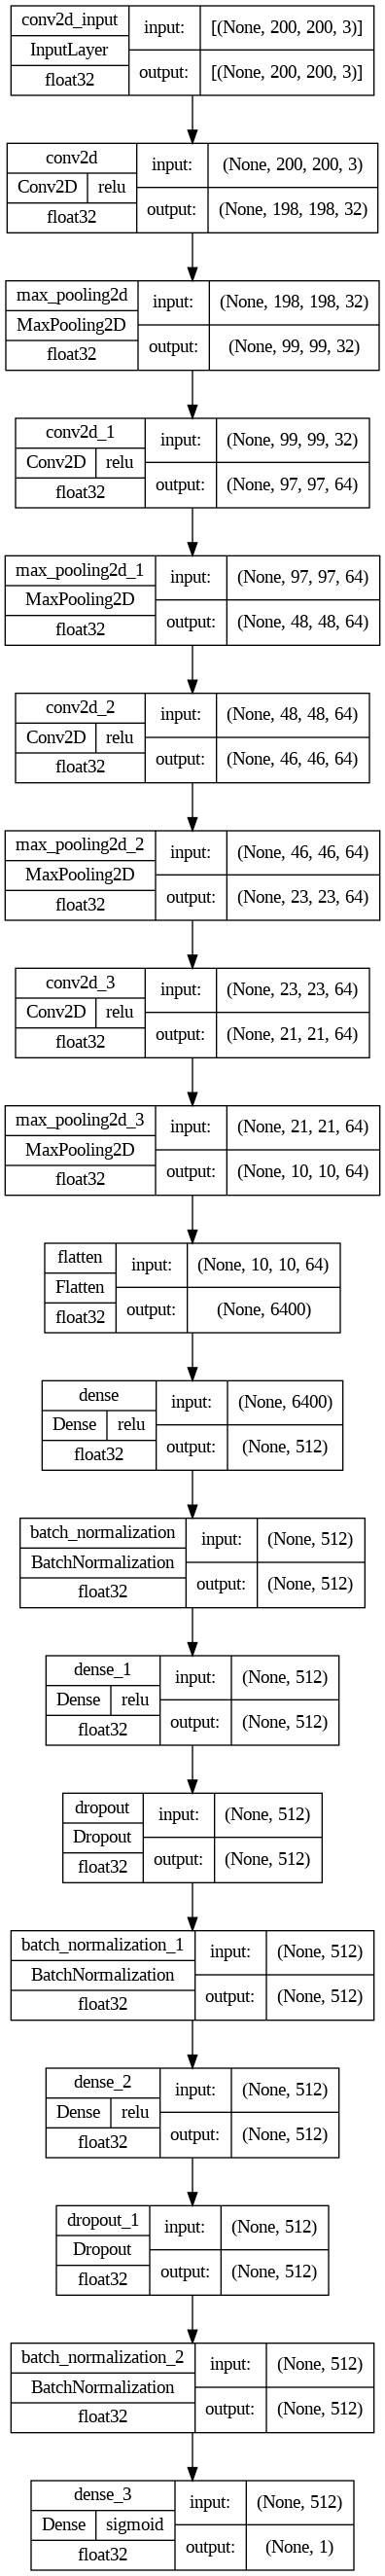

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
28/28 [==============================] - 83s 3s/step - loss: 1.0155 - accuracy: 0.4499 - val_loss: 7.7872 - val_accuracy: 0.5938
Epoch 2/10
28/28 [==============================] - 78s 3s/step - loss: 0.8177 - accuracy: 0.4661 - val_loss: 2.7742 - val_accuracy: 0.2917
Epoch 3/10
28/28 [==============================] - 78s 3s/step - loss: 0.7755 - accuracy: 0.4373 - val_loss: 3.7573 - val_accuracy: 0.2917
Epoch 4/10
28/28 [==============================] - 77s 3s/step - loss: 0.6888 - accuracy: 0.4580 - val_loss: 1.3788 - val_accuracy: 0.6042
Epoch 5/10
28/28 [==============================] - 76s 3s/step - loss: 0.6502 - accuracy: 0.5109 - val_loss: 1.0603 - val_accuracy: 0.3333
Epoch 6/10
28/28 [==============================] - 78s 3s/step - loss: 0.6403 - accuracy: 0.5063 - val_loss: 0.6721 - val_accuracy: 0.5521
Epoch 7/10
28/28 [==============================] - 79s 3s/step - loss: 0.5765 - accuracy: 0.5316 - val_loss: 2.2342 - val_accuracy: 0.6042
Epoch 8/10
28/28 [==

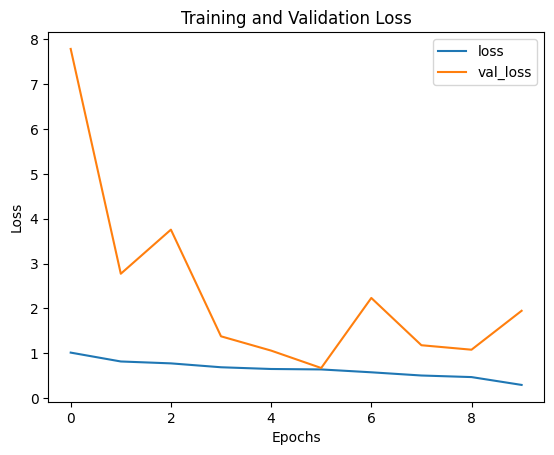

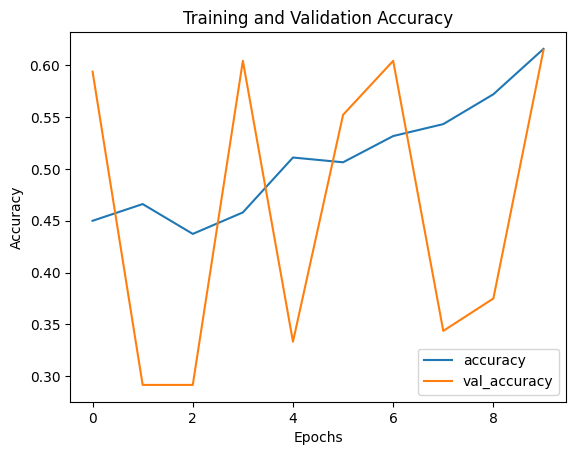

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

history_dict = history.history

# Create DataFrame from history dictionary
history_df = pd.DataFrame(history_dict)

# Plot loss and accuracy curves
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

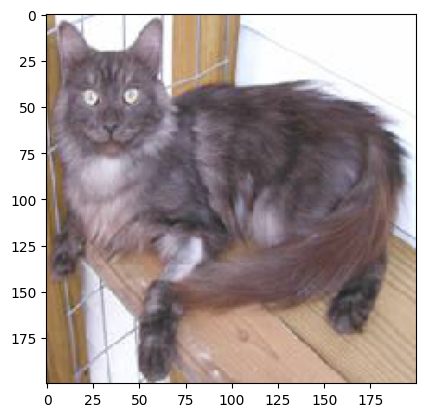

1/1 [==============================] - 0s 221ms/step
Cat


In [12]:
from tensorflow.keras.preprocessing import image

# Input image
test_image = image.load_img('dataset_cat_dog/load_img/83.jpg', target_size=(200, 200))

# For showing the image
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)

# Mapping result array with the class labels
if result >= 0.5:
    print("Dog")
else:
    print("Cat")

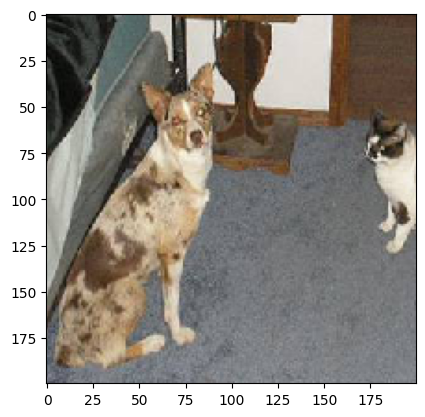

1/1 [==============================] - 0s 48ms/step
Cat


In [15]:
from tensorflow.keras.preprocessing import image

# Input image
test_image = image.load_img('dataset_cat_dog/load_img/12.jpg', target_size=(200, 200))

# For showing the image
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)

# Mapping result array with the class labels
if result >= 0.5:
    print("Dog")
else:
    print("Cat")